<a href="https://colab.research.google.com/github/LiterallyRicky/DataScience-A2/blob/main/Rick_RiveU4Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Unit 4 Project: How do different brand names affect laptop prices?**#


---

Ever wanted to know if a specific type of brand affects price? **View this!**


Using a dataset containing laptop prices, I'll be finding how brand names affect laptop prices!

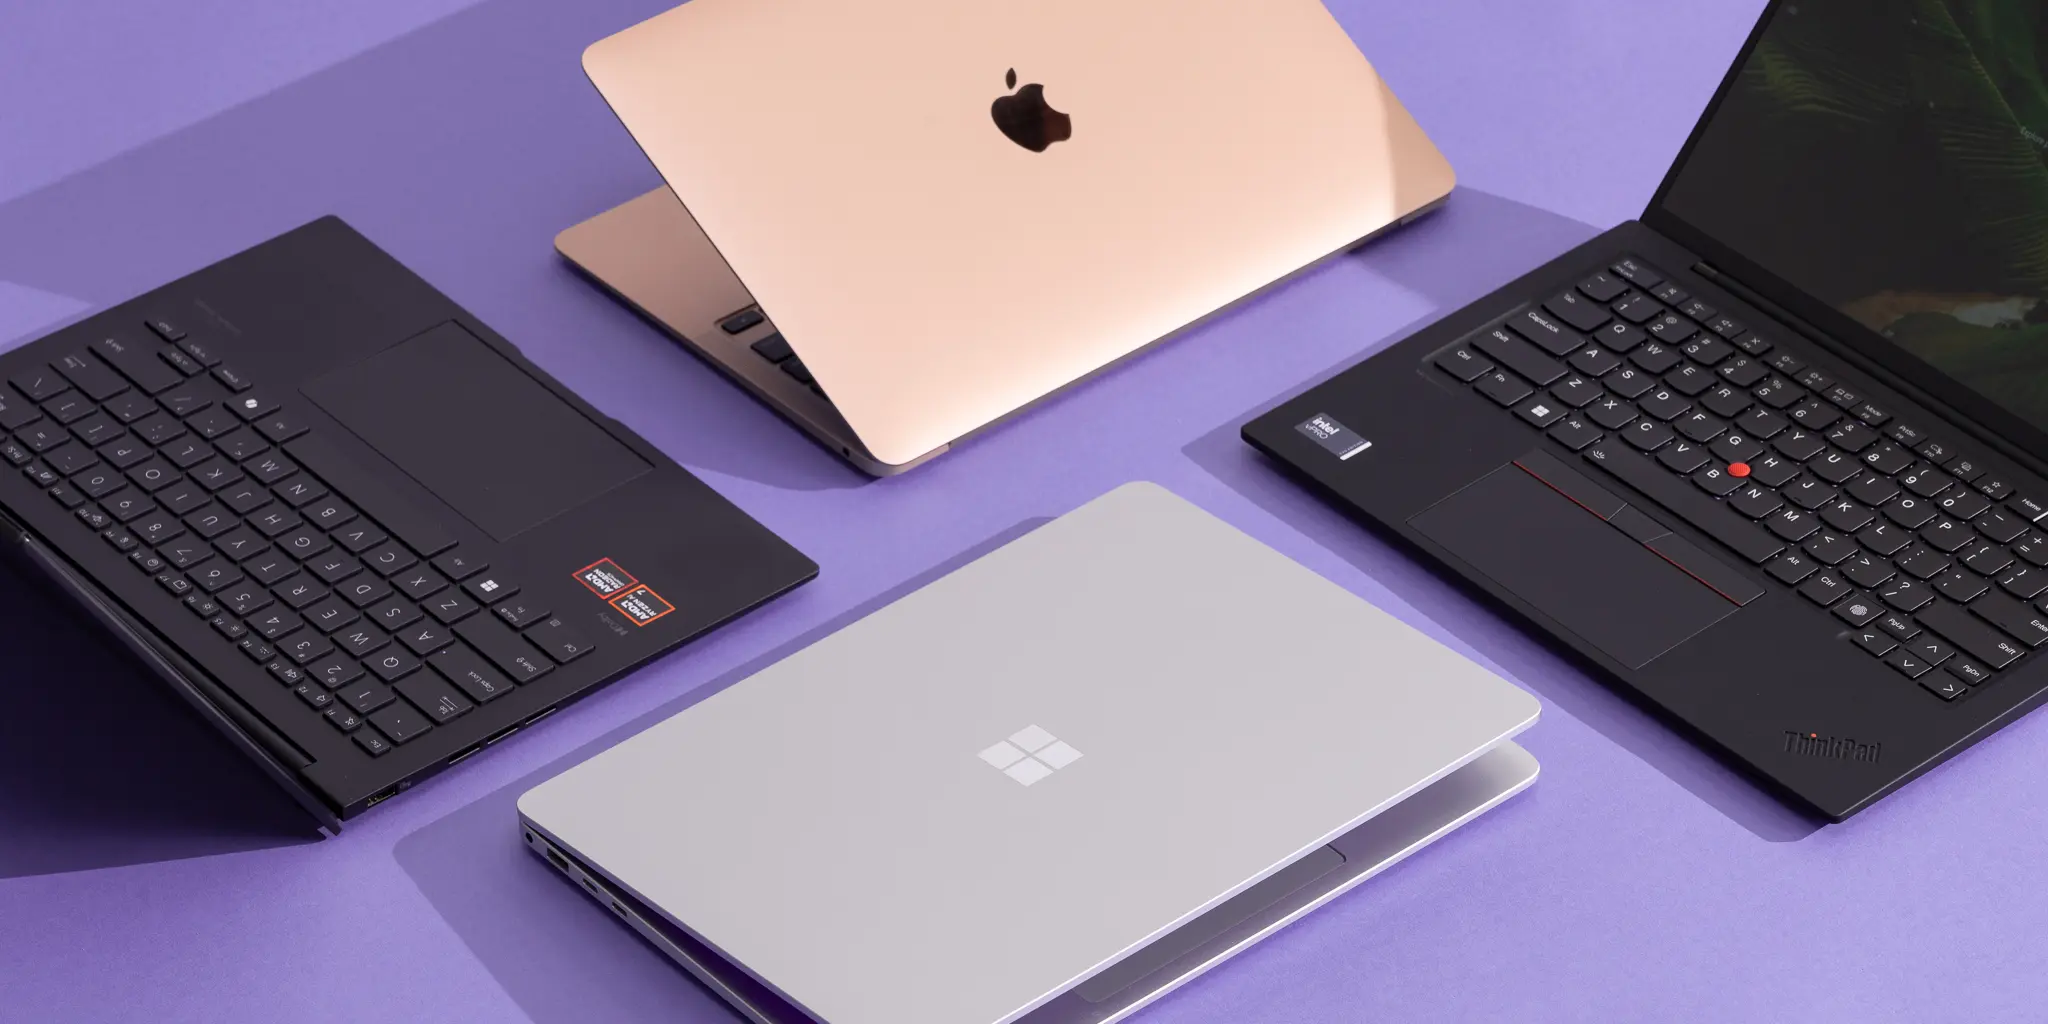

#**Context:**#

As I thought of a dataset for this project, I knew that the dataset I've already used in my [Unit 3 Project](https://github.com/LiterallyRicky/DataScience-A2/blob/main/Rick_RiveU3proj.ipynb), the 'Laptop Price' dataset, could be usable for the point of this project. As there's so many subcategories, I wanted to choose a subgroup that may affect laptop prices.



With this, I came up with the question for this project and I thought it would be interesting to see if there's dependency according with brand and price.


#**Importing Libraries:**#

Like usual, we have to import the libraries before diving into the actual model creation.

In [17]:
#all libraries imported
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import arviz as az
import pymc as pm

Yay.

#**Plotting the Dataset: Visualization**#

To showcase what I'm looking at in the dataset, I'll be plotting the dataset in it's entirety.

Also, if you wanted to know where I got this dataset from, I'll be linking the actual link to the Kaggle dataset: [Laptop Price Dataset](https://www.kaggle.com/datasets/abdelrahmanemad594/laptop-prices)

In [18]:
#loading the dataset from Github, dataset from Kaggle
url_laptops = 'https://raw.githubusercontent.com/LiterallyRicky/DataScience-A2/refs/heads/main/Data/Laptop-Price.csv'
#Reads the csv file
data_laptops = pd.read_csv(url_laptops,dtype={'Company':'category'})

In [19]:
#Models the entirety of the dataset of laptops (1146 laptops)
data_laptops

,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,HDD,Flash Storage,Hybrid,Gpu Brand,Gpu Model,Unnamed: 16,Price_euros
0,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8GB,No OS,Intel,Core i5 7200U,2.5GHz,256,0,0,0,Intel,HD Graphics 620,NaN,575.00
1,Acer,Aspire 3,Notebook,15.6,1366x768,4GB,Windows 10,AMD,A9-Series 9420,3GHz,0,500,0,0,AMD,Radeon R5,NaN,400.00
2,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,16GB,Windows 10,Intel,Core i7 8550U,1.8GHz,512,0,0,0,Nvidia,GeForce MX150,NaN,1495.00
3,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,8GB,Windows 10,Intel,Core i5 8250U,1.6GHz,256,0,0,0,Intel,UHD Graphics 620,NaN,770.00
4,HP,250 G6,Notebook,15.6,1366x768,4GB,No OS,Intel,Core i5 7200U,2.5GHz,0,500,0,0,Intel,HD Graphics 620,NaN,393.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,Dell,Inspiron 3567,Notebook,15.6,1366x768,8GB,Linux,Intel,Core i7 7500U,2.7GHz,0,1,0,0,AMD,Radeon R5 M430,NaN,805.99
1142,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,1366x768,4GB,Windows 10,Intel,Core i7 6500U,2.5GHz,0,500,0,0,Nvidia,GeForce 920M,NaN,720.32
1143,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,4GB,Windows 10,Intel,Core i7 6500U,2.5GHz,128,0,0,0,Intel,HD Graphics 520,NaN,638.00
1144,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,16GB,Windows 10,Intel,Core i7 6500U,2.5GHz,512,0,0,0,Intel,HD Graphics 520,NaN,1499.00


So with this, you can see that there are many subgroups without this dataset that may affect price. It's a lot of possibilites with this one but I think the most interesting may be company names (HP, Dell, Lenovo, eg.,) affecting price which can contain dependency.

Nice, now that we have this, we can continue with making our model!

#**Creating the hierarchial models:**#

**Model 1:**



---



Setting up the neccessities before making the actual model(s).

In [34]:
idx = data_laptops.Company.cat.codes.values
coords = {"Company": data_laptops.Company.cat.categories}

Now we can make our first model. For this model, we're going to making a model that includes all categories in Companies. Meaning that this model will not have any change to it and not any brands removed YET. Following, we're going to exclude some brands to see what happens :D.

In [40]:
with pm.Model(coords=coords) as laptop_price_model:

    #Hyperpriors for the means and standard deviations across companies
    μ_mean = pm.Normal('μ_mean', mu=1000, sigma=500)
    μ_sd = pm.HalfNormal('μ_sd', sigma=300)

    σ_mean = pm.Normal('σ_mean', mu=300, sigma=100)
    σ_sd = pm.HalfNormal('σ_sd', sigma=100)

    # Company-specific priors for mean and standard deviation
    mu = pm.Normal('mu', mu=μ_mean, sigma=μ_sd, dims="Company")
    σ = pm.HalfNormal('σ', sigma=σ_sd, dims="Company")

    # Likelihood
    y = pm.Normal(
        'y',
        mu=mu[idx],
        sigma=σ[idx],
        observed=data_laptops['Price_euros'].values
    )

    # Sampling
    idata_laptops1 = pm.sample(target_accept=0.95)

Output()

Output()

ERROR:pymc.stats.convergence:There were 27 divergences after tuning. Increase `target_accept` or reparameterize.


Now you may be wondering, "why Normal Distributions (Normal + HalfNormal) for prices?". Well, prices are continous and the normal distribution is well-suited for modeling continous data as we have. With the HalfNormal distributions, the supports are only positive which fits our data, as we don't have any negatives. Both are extremely great for modeling our data!

Let's plot the 'plot trace' model now. This is going to take long. :(

array([[<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'mu'}>],
       [<Axes: title={'center': 'μ_mean'}>,
        <Axes: title={'center': 'μ_mean'}>],
       [<Axes: title={'center': 'μ_sd'}>,
        <Axes: title={'center': 'μ_sd'}>],
       [<Axes: title={'center': 'σ'}>, <Axes: title={'center': 'σ'}>],
       [<Axes: title={'center': 'σ_mean'}>,
        <Axes: title={'center': 'σ_mean'}>],
       [<Axes: title={'center': 'σ_sd'}>,
        <Axes: title={'center': 'σ_sd'}>]], dtype=object)

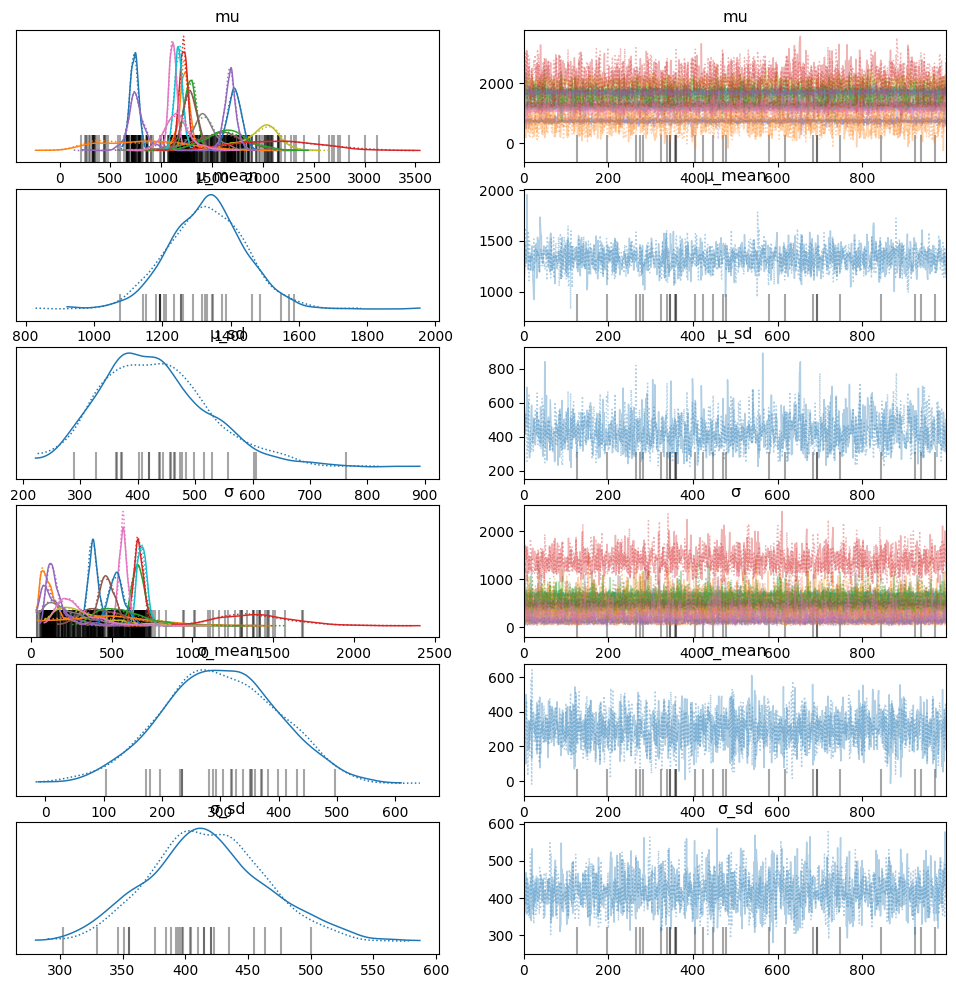

In [41]:
az.plot_trace(idata_laptops1)

So, unfortunately with this model, there's multiple divergences (27), which screws up the data and the plot trace as well. So continuing, we need to elimate this. However, the plot trace isn't terrible, but could be better!

In [42]:
az.rhat(idata_laptops1)

<xarray.Dataset> Size: 916B
Dimensions:  (Company: 17)
Coordinates:
  * Company  (Company) <U9 612B 'Acer' 'Apple' 'Asus' ... 'Toshiba' 'Xiaomi'
Data variables:
    mu       (Company) float64 136B 1.001 1.004 0.9993 1.0 ... 1.0 0.9993 0.9995
    μ_mean   float64 8B 1.0
    μ_sd     float64 8B 1.0
    σ        (Company) float64 136B 0.9995 1.002 0.9998 ... 0.9992 1.001 0.9994
    σ_mean   float64 8B 1.002
    σ_sd     float64 8B 1.003

Honestly, the rhat values aren't too bad, and definitely better than I thought! It's around the range we need the values to be.

Output()

<Axes: xlabel='y'>

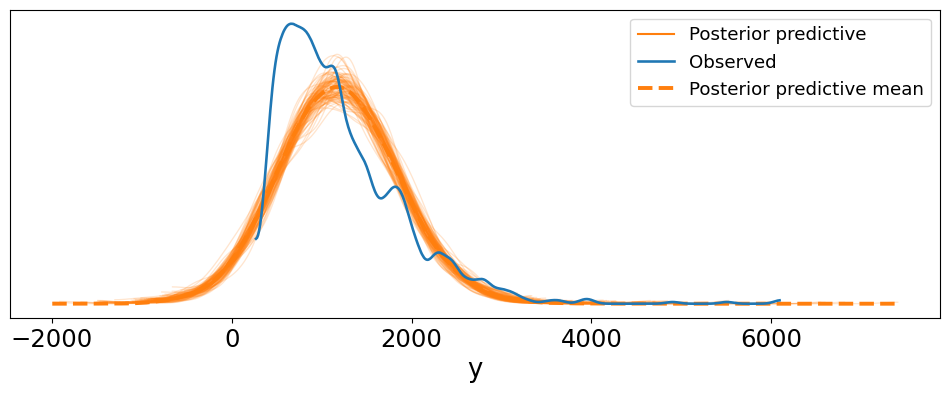

In [45]:
pm.sample_posterior_predictive(idata_laptops1, model = laptop_price_model, extend_inferencedata=True)
az.plot_ppc(idata_laptops1, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

Woah, so this is something I didn't know but I should've realized it beforehand. In my Unit 3 Project, I did something similar with prices but with the question: "What is the true average laptop price?". The PPC model is exactly the same -- same shape and same peak. I really thought that this was interesting! It makes sense though, using the same prices from the same dataset is bound for this to happen.

**Model 2:**



---



First I want to see what brand names are in my dataset without having to scroll and note all of them down. The following code with print out all the company/brand names in the dataset.

In [48]:
brand_names = data_laptops['Company'].unique()

# Prints the list of brand names
print(brand_names)

['HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'MSI' 'Microsoft' 'Toshiba' 'Huawei'
 'Xiaomi' 'Razer' 'Google' 'Fujitsu' 'Samsung' 'LG' 'Mediacom' 'Apple']


Amazing, I didn't know Fujitsu was a company name. Anyways, let's remove 3 of the companies in this following model

In [55]:
import pandas as pd

# Load your dataset
url_laptops = 'https://raw.githubusercontent.com/LiterallyRicky/DataScience-A2/refs/heads/main/Data/Laptop-Price.csv'
data_laptops = pd.read_csv(url_laptops, dtype={'Company': 'category'})

#filtering specific brands
data_laptops = data_laptops[~data_laptops.Company.isin(['HP', 'Apple'])]

# Remove unused categories if necessary
data_laptops.Company = data_laptops.Company.cat.remove_unused_categories()

# copied and pasted from aboce
idx = data_laptops.Company.cat.codes.values
coords = {"Company": data_laptops.Company.cat.categories}

# Print the unique brand names
print(data_laptops['Company'].cat.categories)


Index(['Acer', 'Asus', 'Dell', 'Fujitsu', 'Google', 'Huawei', 'LG', 'Lenovo',
       'MSI', 'Mediacom', 'Microsoft', 'Razer', 'Samsung', 'Toshiba',
       'Xiaomi'],
      dtype='object')


In [57]:
with pm.Model(coords=coords) as laptop_price_model2:

    #Hyperpriors for the means and standard deviations across companies
    μ_mean = pm.Normal('μ_mean', mu=1000, sigma=500)
    μ_sd = pm.HalfNormal('μ_sd', sigma=300)

    σ_mean = pm.Normal('σ_mean', mu=300, sigma=100)
    σ_sd = pm.HalfNormal('σ_sd', sigma=100)

    # Company-specific priors for mean and standard deviation
    mu = pm.Normal('mu', mu=μ_mean, sigma=μ_sd, dims="Company")
    σ = pm.HalfNormal('σ', sigma=σ_sd, dims="Company")

    # Likelihood
    y = pm.Normal(
        'y',
        mu=mu[idx],
        sigma=σ[idx],
        observed=data_laptops['Price_euros'].values
    )

    # Sampling with increased target_accept
    idata_laptops2 = pm.sample(target_accept=0.99)

Output()

Output()

ERROR:pymc.stats.convergence:There were 8 divergences after tuning. Increase `target_accept` or reparameterize.


array([[<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'mu'}>],
       [<Axes: title={'center': 'μ_mean'}>,
        <Axes: title={'center': 'μ_mean'}>],
       [<Axes: title={'center': 'μ_sd'}>,
        <Axes: title={'center': 'μ_sd'}>],
       [<Axes: title={'center': 'σ'}>, <Axes: title={'center': 'σ'}>],
       [<Axes: title={'center': 'σ_mean'}>,
        <Axes: title={'center': 'σ_mean'}>],
       [<Axes: title={'center': 'σ_sd'}>,
        <Axes: title={'center': 'σ_sd'}>]], dtype=object)

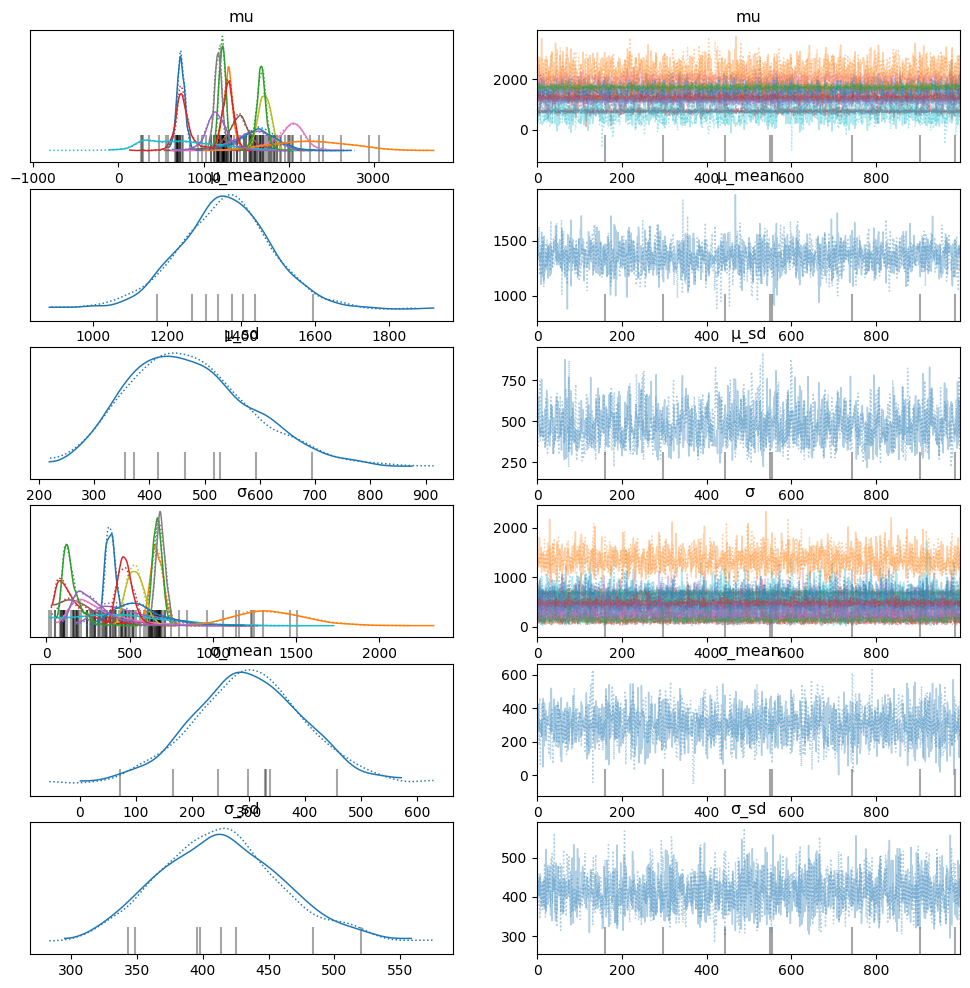

In [58]:
az.plot_trace(idata_laptops2)

In [59]:
az.rhat(idata_laptops1)

<xarray.Dataset> Size: 916B
Dimensions:  (Company: 17)
Coordinates:
  * Company  (Company) <U9 612B 'Acer' 'Apple' 'Asus' ... 'Toshiba' 'Xiaomi'
Data variables:
    mu       (Company) float64 136B 1.001 1.004 0.9993 1.0 ... 1.0 0.9993 0.9995
    μ_mean   float64 8B 1.0
    μ_sd     float64 8B 1.0
    σ        (Company) float64 136B 0.9995 1.002 0.9998 ... 0.9992 1.001 0.9994
    σ_mean   float64 8B 1.002
    σ_sd     float64 8B 1.003

Output()

<Axes: xlabel='y'>

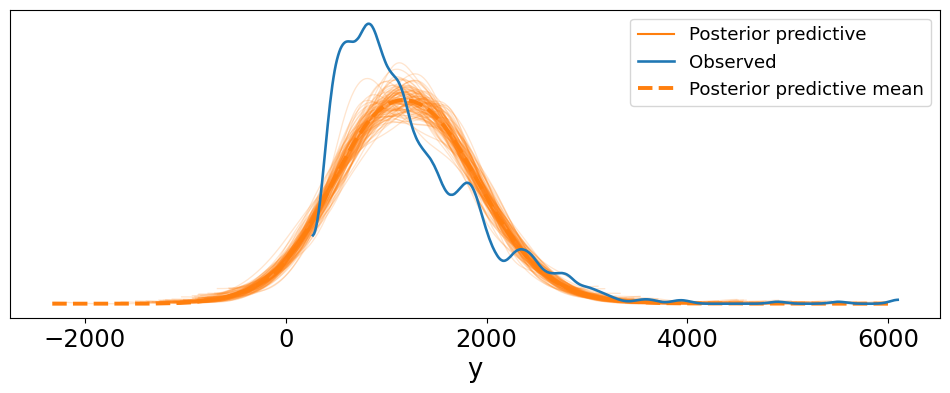

In [60]:
pm.sample_posterior_predictive(idata_laptops2, model = laptop_price_model2, extend_inferencedata=True)
az.plot_ppc(idata_laptops2, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

**Change values in normal + halfnormal distribution parameters**